In [1]:
import cenpy
import contextily as ctx 
import segregation
%matplotlib inline
import matplotlib as mpl

In [2]:
import xyzservices.providers as xyz
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
from contextily import add_basemap
import folium 

In [3]:
import geopandas as gpd 
from census import Census 
from us import states
from shapely.geometry import Polygon

In [4]:
import pandas as pd

**Census Api**

In [5]:
acs=cenpy.products.ACS(year=2019)  
acs.filter_tables('RACE OF HOUSEHOLDER', by='description')


,description,columns
table_name,,
B25006,RACE OF HOUSEHOLDER,"[B25006_001E, B25006_002E, B25006_003E, B25006..."


In [6]:
c = Census('f5e7cf46eaa83ae8323e6051f74d9ab363d0b957')

In [7]:
#B02009	BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
bx_census_tract = c.acs5.state_county_tract(fields = ('NAME', 'B25006_001E', 
                                                      'B25006_002E','B25006_003E','B25006_004E',
                                                     'B25006_005E','B25006_006E','B25006_007E',
                                                     'B25006_008E','B25006_009E'),
                                      state_fips = states.TX.fips,  
                                      county_fips = "029",
                                      tract = "*",
                                      year = 2019)


In [8]:
bx_df = pd.DataFrame(bx_census_tract)
bx_df.head()

,NAME,B25006_001E,B25006_002E,B25006_003E,B25006_004E,B25006_005E,B25006_006E,B25006_007E,B25006_008E,B25006_009E,state,county,tract
0,"Census Tract 1109, Bexar County, Texas",1016.0,891.0,30.0,0.0,29.0,0.0,66.0,0.0,0.0,48,029,110900
1,"Census Tract 1110, Bexar County, Texas",1188.0,776.0,103.0,0.0,41.0,0.0,223.0,45.0,19.0,48,029,111000
2,"Census Tract 1217.01, Bexar County, Texas",1500.0,1220.0,107.0,0.0,52.0,0.0,112.0,9.0,0.0,48,029,121701
3,"Census Tract 1211.19, Bexar County, Texas",2260.0,1962.0,31.0,11.0,76.0,0.0,74.0,106.0,32.0,48,029,121119
4,"Census Tract 1211.20, Bexar County, Texas",1699.0,1407.0,163.0,0.0,31.0,0.0,35.0,63.0,32.0,48,029,121120


In [9]:
print('Shape: ', bx_df.shape)

Shape:  (366, 13)


**Bexar County RACE Population (percentage)**

In [10]:
race_householders = ['B25006_001E',	#all race householders
#'B25006_002E',	#white only
'B25006_003E',	#black only
#'B25006_004E',	
#'B25006_005E',	
#'B25006_006E',	
#'B25006_007E',	
#'B25006_008E',	
#'B25006_009E'
]

In [11]:
bx_race_householders = acs.from_county('Bexar County, TX', variables=race_householders)
bx_race_householders

,GEOID,geometry,B25006_001E,B25006_003E,NAME,state,county,tract
0,48029172003,"POLYGON ((-10991549.490 3431093.620, -10991546...",1423.0,137.0,"Census Tract 1720.03, Bexar County, Texas",48,029,172003
1,48029980005,"POLYGON ((-10998782.030 3444259.380, -10998755...",0.0,0.0,"Census Tract 9800.05, Bexar County, Texas",48,029,980005
2,48029171916,"POLYGON ((-10988475.960 3430907.390, -10988476...",2439.0,387.0,"Census Tract 1719.16, Bexar County, Texas",48,029,171916
3,48029181715,"POLYGON ((-10986344.740 3438538.130, -10986344...",2000.0,74.0,"Census Tract 1817.15, Bexar County, Texas",48,029,181715
4,48029181721,"POLYGON ((-10985293.110 3444164.570, -10985242...",1091.0,31.0,"Census Tract 1817.21, Bexar County, Texas",48,029,181721
...,...,...,...,...,...,...,...,...
361,48029121606,"POLYGON ((-10948094.360 3446505.970, -10948064...",2158.0,171.0,"Census Tract 1216.06, Bexar County, Texas",48,029,121606
362,48029121505,"POLYGON ((-10947696.290 3442318.540, -10947682...",1542.0,240.0,"Census Tract 1215.05, Bexar County, Texas",48,029,121505
363,48029121604,"POLYGON ((-10946103.080 3443996.060, -10946053...",2925.0,669.0,"Census Tract 1216.04, Bexar County, Texas",48,029,121604
364,48029141800,"POLYGON ((-10957590.470 3411153.330, -10957589...",1116.0,7.0,"Census Tract 1418, Bexar County, Texas",48,029,141800


In [12]:
bx_race_householders_basemap, bx_race_householders_extent = ctx.bounds2img(*bx_race_householders.total_bounds, zoom=10,   
                                            source=ctx.providers.OpenStreetMap.Mapnik)

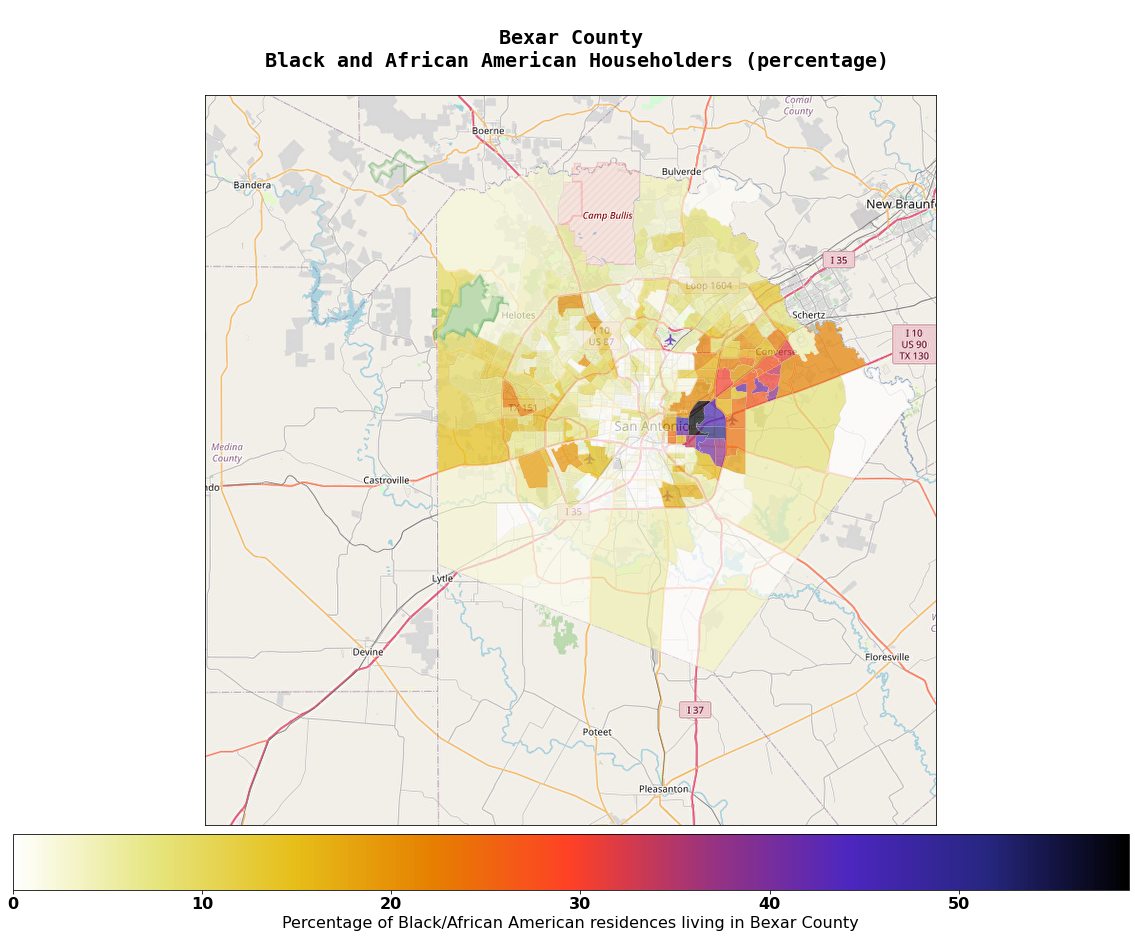

In [13]:
f,ax = plt.subplots(1,1, figsize=(20,16))

plt.rcParams['legend.title_fontsize'] = 'medium'

plt.rcParams['font.size'] = 16

plt.rcParams['font.weight'] = 600

ax.imshow(bx_race_householders_basemap, extent=bx_race_householders_extent, interpolation='sinc')
bx_race_householders['pct_householders'] = bx_race_householders.eval('B25006_003E/B25006_001E')*100 

bx_race_householders.plot('pct_householders', edgecolor='white',linewidth=.2, cmap='CMRmap_r', ax = ax,  
                    alpha=.7, legend=True,
                    legend_kwds={ 'label': "Percentage of Black/African American residences living in Bexar County",'orientation': "horizontal", 'pad':.01})  # type: ignore

plt.title(
    "\nBexar County\n Black and African American Householders (percentage)\n",
    fontsize=20,
    loc='center',
    fontweight='bold',
    #style='italic',
    family='monospace')

plt.style.use('dark_background')

ax.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)